In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split


Function to encode data based on category and change from UTF-8 format

In [ ]:
def read_data(loc, encoding='iso-8859-1'):
    return pd.read_csv(
        loc,
        encoding=encoding,
        true_values=['spam'],
        false_values=['ham'],
    ).assign(
        text=lambda d: d[d.columns[1:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
    ).drop(
        columns=['v2','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
    ).rename(
        columns={
            'v1':'spam'
        }
    )

loc = '/content/spam.csv'
df = read_data(loc)
df

,spam,text
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...
5568,False,Will Ì_ b going to esplanade fr home?
5569,False,"Pity, * was in mood for that. So...any other s..."
5570,False,The guy did some bitching but I acted like i'd...


array([<Axes: ylabel='text'>], dtype=object)

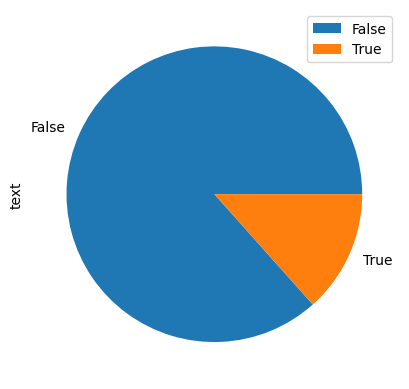

In [ ]:
df.groupby('spam').agg('count').plot.pie(subplots=True)

In [ ]:
df.spam.value_counts()

False    4825
True      747
Name: spam, dtype: int64

In [ ]:
map={False:0,True:1}
df['spam']=df['spam'].map(map)
df

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


To remove stop words from the text

In [ ]:
nltk.download('stopwords')

corpus = []

stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,spam,text
0,0,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor... U c already say...
4,0,"Nah I think goes usf, lives around though"


Tokenize the texts

In [ ]:
nltk.download('punkt') #using the punkt tokenizer
nltk.download('wordnet') #using the wordNet dictionary
from nltk.tokenize import sent_tokenize, word_tokenize
df['text'].apply(sent_tokenize)
df['text'].apply(word_tokenize)
df['text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0       Go jurong point, crazy.. Available bugis n gre...
1                           Ok lar... Joking wif u oni...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3               U dun say early hor... U c already say...
4               Nah I think goes usf, lives around though
                              ...                        
5567    This 2nd time tried 2 contact u. U å£750 Pound...
5568                   Will Ì_ b going esplanade fr home?
5569             Pity, * mood that. So...any suggestions?
5570    The guy bitching I acted like i'd interested b...
5571                                  Rofl. Its true name
Name: text, Length: 5572, dtype: object

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

clean_data_1 = []

for words in df['text']:
    if not words in stopwords.words('english'):
            clean_data_1.append(words)

df['text'] = clean_data_1
df['text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       Go jurong point, crazy.. Available bugis n gre...
1                           Ok lar... Joking wif u oni...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3               U dun say early hor... U c already say...
4               Nah I think goes usf, lives around though
                              ...                        
5567    This 2nd time tried 2 contact u. U å£750 Pound...
5568                   Will Ì_ b going esplanade fr home?
5569             Pity, * mood that. So...any suggestions?
5570    The guy bitching I acted like i'd interested b...
5571                                  Rofl. Its true name
Name: text, Length: 5572, dtype: object

Stemming the texts

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_data = [stemmer.stem(word) for word in clean_data_1]

df['text'] = stemmed_data
df['text']

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4               nah i think goes usf, lives around though
                              ...                        
5567    this 2nd time tried 2 contact u. u å£750 pound...
5568                   will ì_ b going esplanade fr home?
5569             pity, * mood that. so...any suggestions?
5570    the guy bitching i acted like i'd interested b...
5571                                   rofl. its true nam
Name: text, Length: 5572, dtype: object

Lemmatizing the text

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
lemmer = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')

lemm_data = []
for word in df['text']:
  lemm_data.append(lemmer.lemmatize(word))

df['text'] = lemm_data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['text']

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4               nah i think goes usf, lives around though
                              ...                        
5567    this 2nd time tried 2 contact u. u å£750 pound...
5568                   will ì_ b going esplanade fr home?
5569             pity, * mood that. so...any suggestions?
5570    the guy bitching i acted like i'd interested b...
5571                                   rofl. its true nam
Name: text, Length: 5572, dtype: object

In [ ]:
clean_data=[]
for i in (df['text']):
  a=i.lower().split(' ')
  a1=list(a)
  for x in a:

    if(x.isdigit()==True or x.isalpha()==False):
      a1.remove(x)
  clean_data.append(' '.join(a1))

df['text']=clean_data
df.text

0       go jurong available bugis n great world la e c...
1                                         ok joking wif u
2       free entry wkly comp win fa cup final tkts may...
3                             u dun say early u c already
4                    nah i think goes lives around though
                              ...                        
5567    this time tried contact u pound claim call onl...
5568                            will b going esplanade fr
5569                                                 mood
5570    the guy bitching i acted like interested buyin...
5571                                         its true nam
Name: text, Length: 5572, dtype: object

Converting the texts into a vector using vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
data=vect.fit_transform(df.text)
data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df1=pd.DataFrame(data.toarray(),columns=vect.get_feature_names_out())

In [ ]:
len(df1.sum())

6320

In [ ]:
df.drop('text',axis=1,inplace=True)

In [ ]:
new_df=pd.concat([df,df1],axis=1)
new_df

,spam,aa,aah,aaniye,aaooooright,abdomen,abi,ability,abiola,abj,able,about,aboutas,abroad,absolutely,abt,abta,abusers,ac,academic,acc,accenture,accept,access,accidant,accident,accidentally,accommodation,accommodationvouchers,accordin,account,accounting,accounts,ache,achieve,acknowledgement,across,act,acted,actin,acting,action,activate,active,activities,actor,actual,actually,ad,adam,...,yetunde,yi,yifeng,yijue,ym,ymca,yo,yoga,yogasana,yor,yorge,you,youdoing,youi,young,younger,youphone,your,youre,yourinclusive,yours,yourself,youuuuu,youwanna,youåõre,yoville,yoyyooo,yr,yrs,yummi,yummmm,yummy,yun,yunny,yuo,yuou,yup,zac,zebra,zed,zhong,zindgi,zoe,zoom,zouk,zyada,åð,åòharry,åôrents,ìï
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=new_df.iloc[:,1:]
y=new_df.iloc[:,0]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: int64

In [ ]:
#Due to data imbalance
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler(sampling_strategy=0.5)
x,y=oversample.fit_resample(x, y)

In [ ]:
pd.DataFrame(y).value_counts()

spam
0       4825
1       2412
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
regg = LogisticRegression()
regg.fit(x_train,y_train)
score = regg.score(x_test, y_test)
print(score)

0.9829650092081031


In [ ]:
import pickle
pickle.dump(regg,open('LogisticReggMod','wb'))

random classifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
mod= RandomForestClassifier()
mod.fit(x_train,y_train)
score = mod.score(x_test, y_test)
print(score)

0.990791896869245


In [ ]:
import pickle
pickle.dump(mod,open('RandomForest','wb'))

In [ ]:
txt=input()
lst=txt.lower().split(' ')
lst1=[[0 for i in range(len(x.columns))]]
print(lst1)
new_df=pd.DataFrame(lst1,columns=x.columns)
for i in lst:
  if(i in x.columns):
    new_df[i]+=1
y_pred=mod.predict(new_df)
ans=pd.Series(y_pred).map({0:"Ham",1:"Spam"})
ans


this is a sunnyday
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

0    Ham
dtype: object

naive bayes model

In [ ]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(force_alpha=True)
model = clf.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

IndexError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

ValueError: ignored

In [ ]:
score = model.score(x_test, y_test)
print(score)

0.9673112338858195


In [ ]:
txt=input()
lst=txt.lower().split(' ')
lst1=[[0 for i in range(len(x.columns))]]
new_df=pd.DataFrame(lst1,columns=x.columns)
for i in lst:
  if(i in x.columns):
    new_df[i]+=1
y_pred=model.predict(new_df)
ans=pd.Series(y_pred).map({0:"Ham",1:"Spam"})
ans


Congratulations! You’ve won a free iPhone 12. To claim your prize, please follow the link below: [link]


0    Spam
dtype: object

In [ ]:
import pickle
pickle.dump(mod,open('NaiveBayes','wb'))